# Handwritten digits classification using TensorFlow

Putting all the concepts we have learned so far, we will see how can use tensorflow to
build a neural network to recognize handwritten digits. If you are playing around deep
learning off late then you must have come across MNIST dataset. It is being called the hello
world of deep learning.

It consists of 55,000 data points of handwritten digits (0 to 9).
In this section, we will see how can we use our neural network to recognize the
handwritten digits and also we will get hang of tensorflow and tensorboard.


## Import required libraries

As a first step, let us import all the required libraries:

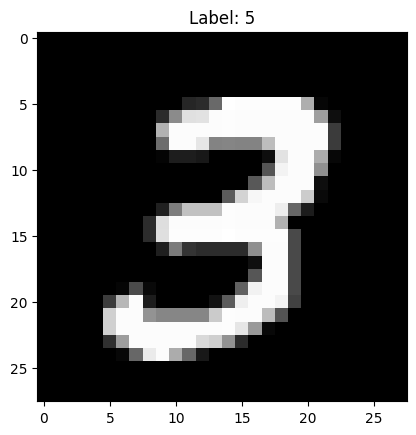

In [88]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Display the first image in the training data
plt.imshow(x_train[7], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


In [4]:
import tensorflow as tf

# Print TensorFlow version
print(tf.__version__)


2.16.1


## Load the Dataset

In the below code, "data/mnist" implies the location where we store the MNIST dataset.
one_hot=True implies we are one-hot encoding the labels (0 to 9):

In [89]:

mnist = tf.keras.datasets.mnist


Let's check what we got in our data:

In [90]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding if needed
y_train_one_hot = tf.keras.utils.to_categorical(y_train, 10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)


# Print the number of images and labels in the training and test sets
print("Number of images in training set: {}".format(x_train.shape[0]))
print("Number of labels in training set: {}".format(y_train.shape[0]))

print("Number of images in test set: {}".format(x_test.shape[0]))
print("Number of labels in test set: {}".format(y_test.shape[0]))

Number of images in training set: 60000
Number of labels in training set: 60000
Number of images in test set: 10000
Number of labels in test set: 10000


We have 55,000 images in the training set and each image is of size 784 and we have 10 labels which are actually 0 to 9. Similarly, we have 10000 images in the test set.

Now we plot one image to see how it looks like:

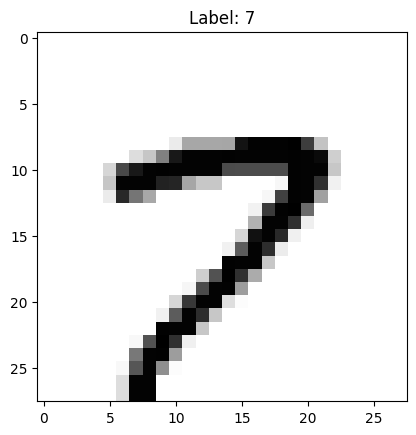

In [96]:
img1 = x_train[123].reshape(28, 28)
#reshape(28, 28) reshapes the 1-dimensional array representing the image into a 2-dimensional (28x28) array. 
# This is necessary because the images in MNIST dataset are flattened into 1D arrays (784 pixels).
plt.imshow(img1, cmap='Greys')
#cmap='Greys' specifies the colormap to use for displaying the image. 'Greys' colormap displays the image in grayscale.
plt.title(f"Label: {y_train[123]}")
plt.show()

## Define the number of neurons in each layer

We build a 4 layer neural network with 3 hidden layers and 1 output layer. As the size of
the input image is 784. We set the num_input to 784 and since we have 10 handwritten
digits (0 to 9), We set 10 neurons in the output layer. We define the number of neurons in
each layer as follows,

Hidden Layers: Perform computations to transform the input data into a format that makes it easier for the network to learn patterns and relationships in the data.

Output Layer: Produces the final predictions or classifications for the input data.
## Training Context:
During training, the neural network adjusts the weights and biases of each neuron through an optimization process (e.g., using gradient descent and backpropagation). The goal is to minimize a defined loss function (like cross-entropy in classification tasks) and improve the accuracy of predictions on the training data.
The specified architecture (number of layers and neurons) influences the capacity of the model to learn complex patterns in the data. Deeper networks with more neurons can potentially capture more intricate relationships but require more computational resources and may be prone to overfitting if not properly regularized.
## Summary:
In summary, specifying the number of neurons in each layer defines the architecture of a neural network model. Each layer's configuration influences how the model processes and learns from the input data, leading to the model's ability to generalize and make accurate predictions on unseen data during training and evaluation phases. Adjusting these parameters involves balancing model complexity, computational efficiency, and performance metrics such as accuracy and loss.

In [50]:
#number of neurons in input layer
num_input = 784

#number of neurons in hidden layer 1
num_hidden1 = 256

#number of neurons in hidden layer 2
num_hidden2 = 128

#number of neurons in hidden layer 3
num_hidden3 = 64

#number of neurons in output layer
num_output = 10

## Defining placeholders

As we learned, we first need to define the placeholders for input and output. Values for
the placeholders will be feed at the run time through feed_dict:


In summary, the provided code sets up input and output placeholders (X and Y) using TensorFlow's Keras API. These placeholders define the shape and structure of the input and output data expected by the neural network model. Organizing these placeholders within tf.name_scope helps maintain clarity and organization within the computational graph, which is crucial for managing larger and more complex models.

Input : data with array has 784
Output : data with array has 10 , from 0 to 9 to detect the number in the images

In [93]:
with tf.name_scope('input'):
    X = tf.keras.Input(shape=(num_input,), name='X')

with tf.name_scope('output'):
    Y = tf.keras.Input(shape=(num_output,), name='Y')

Since we have a 4 layer network, we have 4 weights and 4 baises. We initialize our weights
by drawing values from the truncated normal distribution with a standard deviation of
0.1.

Remember, the dimensions of the weights matrix should be a number of neurons in the
previous layer x number of neurons in the current layer. For instance, the dimension of
weight matrix w3 should be the number of neurons in the hidden layer 2 x number of
neurons in hidden layer 3.

We often define all the weights in a dictionary as given below:

## Step 1 
with tf.name_scope('weights')::

tf.name_scope is used to group operations and variables within TensorFlow, providing better visualization and organization in the computational graph.
Here, it encapsulates the definition of weights (weights['w1'], weights['w2'], weights['w3'], and weights['out']) for the neural network.

## Step 2 
Weights Initialization:

'w1': Represents the weights connecting the input layer to the first hidden layer.

Shape: [num_input, num_hidden1]
tf.random.truncated_normal: Initializes the weights with values drawn from a truncated normal distribution.
stddev=0.1: Specifies the standard deviation of the distribution.
name='weight_1': Assigns a name to this variable in TensorFlow.


'w2': Represents the weights connecting the first hidden layer to the second hidden layer.

Shape: [num_hidden1, num_hidden2]
Similar initialization and naming conventions as 'w1'.

'w3': Represents the weights connecting the second hidden layer to the third hidden layer.

Shape: [num_hidden2, num_hidden3]
Similar initialization and naming conventions.
'out': Represents the weights connecting the third hidden layer to the output layer.

Shape: [num_hidden3, num_output]
Similar initialization and naming conventions.

## Purpose 

Weights (weights):

These variables ('w1', 'w2', 'w3', 'out') store the connection weights between layers in a neural network.
They are critical parameters that the network learns during training to optimize performance on a given task (e.g., classification).
Initialized using tf.random.truncated_normal, ensuring that weights start with small random values, which helps prevent the network from getting stuck during training.
TensorFlow Variable:

Each weight is defined as a TensorFlow Variable, which means its value can be modified during training to minimize the loss function (i.e., the difference between predicted and actual outputs).

## Summary 
The provided code initializes and organizes weights for a neural network using TensorFlow. Each weight ('w1', 'w2', 'w3', 'out') connects specific layers of the network and is essential for learning and making predictions. Organizing these weights within tf.name_scope helps maintain clarity and structure in the computational graph, facilitating easier management and debugging of complex models.

## Output meaning 

- Each element in this matrix (array) represents the strength of the connection (weight) between a specific input neuron and a specific neuron in the first hidden layer.
- The values are initialized using a truncated normal distribution with a standard deviation of 0.1, meaning they are small random numbers centered around zero.
- During training, these weights will be adjusted through backpropagation to minimize the loss function, helping the neural network learn patterns in the training data.

In [101]:
with tf.name_scope('weights'):
    weights = {
        'w1': tf.Variable(tf.random.truncated_normal([num_input, num_hidden1], stddev=0.1), name='weight_1'),
        'w2': tf.Variable(tf.random.truncated_normal([num_hidden1, num_hidden2], stddev=0.1), name='weight_2'),
        'w3': tf.Variable(tf.random.truncated_normal([num_hidden2, num_hidden3], stddev=0.1), name='weight_3'),
        'out': tf.Variable(tf.random.truncated_normal([num_hidden3, num_output], stddev=0.1), name='weight_4'),
    }

print(weights)


{'w1': <tf.Variable 'weights/weight_1:0' shape=(784, 256) dtype=float32, numpy=
array([[-0.10601294,  0.15786554,  0.13444538, ...,  0.19747466,
         0.1251301 ,  0.07689772],
       [-0.15778245, -0.06543959,  0.09584814, ...,  0.02265877,
         0.00513231,  0.04495052],
       [ 0.14997043,  0.080705  , -0.16437049, ...,  0.01410505,
         0.09432485,  0.06860576],
       ...,
       [ 0.09020429, -0.01976741,  0.05815829, ..., -0.10513723,
         0.06359536, -0.05843518],
       [-0.15192904,  0.05339912,  0.0148823 , ..., -0.02586138,
         0.07445789,  0.05971372],
       [-0.14789155, -0.18922776,  0.00361359, ...,  0.00646393,
         0.08639098, -0.00982498]], dtype=float32)>, 'w2': <tf.Variable 'weights/weight_2:0' shape=(256, 128) dtype=float32, numpy=
array([[-0.03035381, -0.14842565, -0.05262039, ...,  0.0389008 ,
        -0.04062995,  0.08781775],
       [ 0.04659995,  0.03598044,  0.04133796, ...,  0.0140517 ,
         0.00040473, -0.0102139 ],
       [-0.

The dimension of bias should be a number of neurons in the current layer. For instance, the
dimension of bias b2 is the number of neurons in the hidden layer 2. We set the bias value
as constant 0.1 in all layers:

## Explain code 
- biases = { ... }:
This dictionary biases contains TensorFlow variables (tf.Variable) representing biases for different layers of the neural network.


'b1':

tf.Variable(tf.constant(0.1, shape=[num_hidden1]), name='bias_1')
tf.constant(0.1, shape=[num_hidden1]): Initializes a constant tensor with value 0.1 and shape [num_hidden1]. This sets the initial bias values to 0.1 for the first hidden layer.
tf.Variable(...): Converts the constant tensor into a TensorFlow variable.
name='bias_1': Specifies the name of the variable in TensorFlow's graph.

'b2', 'b3', 'out':

These follow a similar pattern as 'b1'.
They initialize biases for the second hidden layer (b2), third hidden layer (b3), and the output layer (out) respectively.
Each bias tensor is initialized with a constant value of 0.1 and has a shape corresponding to the number of neurons in its respective layer (num_hidden2, num_hidden3, num_output).

## Purpose of Biases in Neural Networks:
- Biases are additional parameters in neural networks that allow the model to fit the data better and make the network more flexible in its predictions.
- Each neuron typically has its own bias, which is added to the weighted sum of inputs before applying the activation function.
- Biases help in shifting the activation function to better fit the data, especially when the weighted sum of inputs is zero or negative.


In [116]:
with tf.name_scope('biases'):

    biases = {
        'b1': tf.Variable(tf.constant(0.1, shape=[num_hidden1]),name='bias_1'),
        'b2': tf.Variable(tf.constant(0.1, shape=[num_hidden2]),name='bias_2'),
        'b3': tf.Variable(tf.constant(0.1, shape=[num_hidden3]),name='bias_3'),
        'out': tf.Variable(tf.constant(0.1, shape=[num_output]),name='bias_4')
    }

## Forward Propagation

Now, we define the forward propagation operation. We use relu activations in all layers
and in the last layer we use sigmoid activation as defined below:

## Summay the code below:
- The provided code snippet constructs a sequential neural network model using TensorFlow's Keras API. It consists of three hidden layers with ReLU activation and an output layer with sigmoid activation. Each layer's configuration defines the number of neurons and activation function used, thereby creating a network capable of learning and making predictions based on the provided data inputs.

## Explain detail code 

model = tf.keras.Sequential([...]):

This line creates a sequential model in TensorFlow using tf.keras.Sequential.
Sequential models are linear stacks of layers, where each layer has exactly one input tensor and one output tensor.
Layers in the Sequential Model:

tf.keras.layers.Dense(num_hidden1, activation='relu', input_shape=(num_input,), name='layer1'):

This defines the first layer (layer1) of the model.
tf.keras.layers.Dense: This indicates a fully connected (dense) layer, where each neuron is connected to every neuron in the previous layer.
num_hidden1: Number of neurons in the layer. This layer has num_hidden1 neurons.
activation='relu': Activation function used in this layer is ReLU (Rectified Linear Unit), which helps introduce non-linearity.
input_shape=(num_input,): Specifies the shape of input data expected by this layer. For the first layer, this parameter is required and defines the shape of input data.
name='layer1': Name of the layer in the TensorFlow graph.
tf.keras.layers.Dense(num_hidden2, activation='relu', name='layer2'):

This defines the second layer (layer2) of the model.
Similar to the first layer, but without input_shape since it follows layer1.
num_hidden2: Number of neurons in the second hidden layer.
activation='relu': ReLU activation function is used again.
tf.keras.layers.Dense(num_hidden3, activation='relu', name='layer3'):

Defines the third layer (layer3) of the model.
Similar to the previous layers with num_hidden3 neurons and ReLU activation.
tf.keras.layers.Dense(num_output, activation='sigmoid', name='output_layer'):

Defines the output layer (output_layer) of the model.
num_output: Number of neurons in the output layer. Typically, this corresponds to the number of classes in a classification problem.
activation='sigmoid': Sigmoid activation function is used in the output layer, which is suitable for binary classification tasks where each output neuron represents a class probability.
Purpose of Each Layer:


## Purpose of Each Layer:
- Input Layer (layer1):

Receives input data with shape (num_input,).
- Applies ReLU activation to introduce non-linearity.
Hidden Layers (layer2, layer3):

Process the input from previous layers using num_hidden2 and num_hidden3 neurons respectively.
Each layer applies ReLU activation function to learn complex patterns in the data.
Output Layer (output_layer):

- Produces the final output predictions.
Uses sigmoid activation to produce output values between 0 and 1, suitable for binary classification or multi-label classification where each output can be interpreted as a class probability.
Summary:

In [114]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_hidden1, activation='relu', input_shape=(num_input,), name='layer1'),
    tf.keras.layers.Dense(num_hidden2, activation='relu', name='layer2'),
    tf.keras.layers.Dense(num_hidden3, activation='relu', name='layer3'),
    tf.keras.layers.Dense(num_output, activation='sigmoid', name='output_layer')
])

## Compute Loss and Backpropagate



Next, we define our loss function. We use softmax cross-entropy as our loss
function. Tensorflow
provides tf.nn.softmax_cross_entropy_with_logits() function for computing the
softmax cross entropy loss. It takes the two parameters as inputs logits and labels.

* logits implies the logits predicted by our network. That is, y_hat

* labels imply the actual labels. That is, true labels y


We take mean of the loss using tf.reduce_mean()

In [110]:
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',  # Using categorical crossentropy for multi-class classification
              metrics=['accuracy'])

Now, we need to minimize the loss using backpropagation. Don't worry! We don't have to
calculate derivatives of all the weights manually. Instead, we can use tensorflow's
optimizer. In this section, we use Adam optimizer. It is a variant of gradient descent
optimization technique we learned in the previous chapter. In the next chapter, we will
dive into detail and see how exactly all the Adam and several other optimizers work. For
now, let's say we use Adam optimizer as our backpropagation algorithm,


tf.train.AdamOptimizer() requires the learning rate as input. So we set 1e-4 as the learning rate and we minimize the loss with minimize() function. It computes the gradients and updates the parameters (weights and biases) of our network.

In [108]:
optimizer = tf.keras.optimizers.Adam()

##  Compute Accuracy

We calculate the accuracy of our model as follows.


* y_hat denotes the predicted probability for each class by our model. Since we have 10 classes we will have 10 probabilities. If the probability is high at position 7, then it means that our network predicts the input image as digit 7 with high probability.  tf.argmax() returns the index of the largest value. Thus, tf.argmax(y_hat,1) gives the index where the probability is high. Thus, if the probability is high at index 7, then it returns 7
<br>


* Y denotes the actual labels and it is the one hot encoded values. That is, it consists of zeros everywhere except at the position of the actual image where it consists of 1. For instance, if the input image is 7, then Y has 0 at all indices except at index 7 where it has 1. Thus, tf.argmax(Y,1) returns 7 because that is where we have high value i.e 1.


Thus, tf.armax(y_hat,1) gives the predicted digit and tf.argmax(Y,1) gives us the actual digit.

tf.equal(x, y) takes x and y as inputs and returns the truth value of (x == y) element-wise. Thus, correct_pred = tf.equal(predicted_digit,actual_digit) consists of True where the actual and predicted digits are same and False where the actual and predicted digits are not the same. We convert the boolean values in correct_pred into float using tensorflow's cast operation. That is, tf.cast(correct_pred, tf.float32). After converting into float values, take the average using tf.treduce_mean().

Thus, tf.reduce_mean(tf.cast(correct_pred, tf.float32)) gives us the average correct predictions.


## Explaining code
Reshape Method:

reshape(-1, 28*28) transforms the array into a 2D array.
-1 is a placeholder that tells NumPy to automatically calculate the number of rows. It essentially means "as many rows as needed based on the size of the original array and the new dimensions."
28*28 calculates to 784, which means each image (originally a 28x28 2D array) will be flattened into a 1D array of 784 elements.

## Sample Code with visible output to understand
- Example 3D array (2 images of 2x3 pixels)
x_train = np.array([
    [[1, 2, 3],
     [4, 5, 6]],
    
    [[7, 8, 9],
     [10, 11, 12]]
])

- Original shape: (2, 2, 3)
print("Original shape:", x_train.shape)

- Reshaping
x_train_flat = x_train.reshape(-1, 2*3)

- New shape: (2, 6)
print("New shape:", x_train_flat.shape)

- Output the reshaped array
print(x_train_flat)

- Ouput Result 
Original shape: (2, 2, 3)
New shape: (2, 6)
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]

Here, two 2x3 images are flattened into two 1x6 arrays.

Why Reshape?
Neural Networks: Many machine learning models, especially fully connected neural networks, expect input as a flat 1D array per sample.
Consistency: Ensures consistent input shape for the model, making data handling simpler.
Preprocessing: Often used in data preprocessing pipelines to prepare data for various machine learning algorithms.

In [137]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data to flatten each image
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print the number of images and labels in the training and test sets
print("Number of images in training set: {}".format(x_train.shape[0]))
print("Number of labels in training set: {}".format(y_train.shape[0]))

print("Number of images in test set: {}".format(x_test.shape[0]))
print("Number of labels in test set: {}".format(y_test.shape[0]))

# Define network parameters
num_input = 784  # 28*28
num_hidden1 = 256
num_hidden2 = 128
num_hidden3 = 64
num_hidden4 = 32
num_output = 10  # number of classes

# Define the model using tf.keras.Sequential

with tf.name_scope('weights'):
    weights = {
        'w1': tf.Variable(tf.random.truncated_normal([num_input, num_hidden1], stddev=0.1), name='weight_1'),
        'w2': tf.Variable(tf.random.truncated_normal([num_hidden1, num_hidden2], stddev=0.1), name='weight_2'),
        'w3': tf.Variable(tf.random.truncated_normal([num_hidden2, num_hidden3], stddev=0.1), name='weight_3'),
        'out': tf.Variable(tf.random.truncated_normal([num_hidden3, num_output], stddev=0.1), name='weight_4'),
    }

with tf.name_scope('biases'):

    biases = {
        'b1': tf.Variable(tf.constant(0.1, shape=[num_hidden1]),name='bias_1'),
        'b2': tf.Variable(tf.constant(0.1, shape=[num_hidden2]),name='bias_2'),
        'b3': tf.Variable(tf.constant(0.1, shape=[num_hidden3]),name='bias_3'),
        'out': tf.Variable(tf.constant(0.1, shape=[num_output]),name='bias_4')
    }

model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_hidden1, activation='relu', input_shape=(num_input,), name='layer1'),
    tf.keras.layers.Dense(num_hidden2, activation='relu', name='layer2'),
    tf.keras.layers.Dense(num_hidden3, activation='relu', name='layer3'),
    tf.keras.layers.Dense(num_hidden4, activation='relu', name='layer4'),
    tf.keras.layers.Dense(num_output, activation='softmax', name='output_layer')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])

#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse']) -> accuracy very low


# Train the model
model.fit(x_train_flat, y_train, epochs=5, batch_size=32,
          validation_data=(x_test_flat, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test_flat, y_test, verbose=2)
print("\nTest accuracy:", test_acc)


Number of images in training set: 60000
Number of labels in training set: 60000
Number of images in test set: 10000
Number of labels in test set: 10000
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - loss: 0.1021 - mse: 0.0232 - val_loss: 0.0248 - val_mse: 0.0068
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 0.0182 - mse: 0.0047 - val_loss: 0.0165 - val_mse: 0.0044
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - loss: 0.0122 - mse: 0.0033 - val_loss: 0.0155 - val_mse: 0.0042
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 0.0085 - mse: 0.0023 - val_loss: 0.0154 - val_mse: 0.0038
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 0.0071 - mse: 0.0019 - val_loss: 0.0148 - val_mse: 0.0038
313/313 - 1s - 2ms/step - loss: 0.0148 - mse: 0.0038

Test accuracy: 0.0037568954285234213


In [136]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data to flatten each image
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print the number of images and labels in the training and test sets
print("Number of images in training set: {}".format(x_train.shape[0]))
print("Number of labels in training set: {}".format(y_train.shape[0]))

print("Number of images in test set: {}".format(x_test.shape[0]))
print("Number of labels in test set: {}".format(y_test.shape[0]))

# Define network parameters
num_input = 784  # 28*28
num_hidden1 = 256
num_hidden2 = 128
num_hidden3 = 64
num_hidden4 = 32
num_output = 10  # number of classes

# Define the model using tf.keras.Sequential

with tf.name_scope('weights'):
    weights = {
        'w1': tf.Variable(tf.random.truncated_normal([num_input, num_hidden1], stddev=0.1), name='weight_1'),
        'w2': tf.Variable(tf.random.truncated_normal([num_hidden1, num_hidden2], stddev=0.1), name='weight_2'),
        'w3': tf.Variable(tf.random.truncated_normal([num_hidden2, num_hidden3], stddev=0.1), name='weight_3'),
        'out': tf.Variable(tf.random.truncated_normal([num_hidden3, num_output], stddev=0.1), name='weight_4'),
    }

with tf.name_scope('biases'):

    biases = {
        'b1': tf.Variable(tf.constant(0.1, shape=[num_hidden1]),name='bias_1'),
        'b2': tf.Variable(tf.constant(0.1, shape=[num_hidden2]),name='bias_2'),
        'b3': tf.Variable(tf.constant(0.1, shape=[num_hidden3]),name='bias_3'),
        'out': tf.Variable(tf.constant(0.1, shape=[num_output]),name='bias_4')
    }

model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_hidden1, activation='relu', input_shape=(num_input,), name='layer1'),
    tf.keras.layers.Dense(num_hidden2, activation='relu', name='layer2'),
    tf.keras.layers.Dense(num_hidden3, activation='relu', name='layer3'),
    tf.keras.layers.Dense(num_hidden4, activation='relu', name='layer4'),
    tf.keras.layers.Dense(num_output, activation='softmax', name='output_layer')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])


# Train the model
model.fit(x_train_flat, y_train, epochs=5, batch_size=32,
          validation_data=(x_test_flat, y_test))

# Evaluate the model
evaluation = model.evaluate(x_test_flat, y_test, verbose=2)
test_loss = evaluation[0]
test_acc = evaluation[1]

print("\nTest accuracy:", test_acc)


Number of images in training set: 60000
Number of labels in training set: 60000
Number of images in test set: 10000
Number of labels in test set: 10000
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8164 - loss: 0.1104 - precision_2: 0.9083 - recall_2: 0.7584 - val_accuracy: 0.9637 - val_loss: 0.0216 - val_precision_2: 0.9672 - val_recall_2: 0.9619
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9700 - loss: 0.0189 - precision_2: 0.9728 - recall_2: 0.9685 - val_accuracy: 0.9700 - val_loss: 0.0172 - val_precision_2: 0.9720 - val_recall_2: 0.9691
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9812 - loss: 0.0118 - precision_2: 0.9825 - recall_2: 0.9806 - val_accuracy: 0.9722 - val_loss: 0.0163 - val_precision_2: 0.9736 - val_recall_2: 0.9714
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9847 - loss: 0.0091 - precision_2: 0.9859 - recall_2: 0.9841 - val_accuracy: 0.9786 - val_loss: 0.0140 - val_precision_2: 

## Create Summary

We can also visualize how the loss and accuracy of our model change during several
iterations in tensorboard. So, we use tf.summary() to get the summary of the variable.
Since the loss and accuracy are scalar variables, we use tf.summary.scalar() to store the summary as shown below:

In [73]:
def log_metrics(epoch, logs):
    with summary_writer.as_default():
        tf.summary.scalar('Loss', logs['loss'], step=epoch)
        tf.summary.scalar('Accuracy', logs['accuracy'], step=epoch)

Next, we merge all the summaries we use in our graph using tf.summary.merge_all(). We merge all summaries because when we have many summaries running and storing them would become inefficient, so we merge all the summaries and run them once in our session instead of running multiple times.

In [75]:
log_dir = './logs'
summary_writer = tf.summary.create_file_writer(log_dir)

## Train the Model

Now it is time to train our model. As we learned, first we need to initialize all the variables:

In [124]:
import tensorflow as tf

# Example explicit variable initialization
w = tf.Variable(tf.random.normal(shape=(784, 256)), name='weight')
b = tf.Variable(tf.zeros(shape=(256,)), name='bias')

# Explicitly assign initial values (if needed)
w.assign(tf.random.normal(shape=(784, 256)))
b.assign(tf.zeros(shape=(256,)))

# Use variables in a model or computation
x = tf.random.normal(shape=(32, 784))
output = tf.matmul(x, w) + b

print(output)


tf.Tensor(
[[ 34.74552    -49.10192     31.853767   ... -28.479866    33.149857
  -47.112587  ]
 [ 12.811256    -0.719841    21.735346   ...  16.905941   -41.464085
   14.001776  ]
 [  2.1387434  -49.768616    23.079247   ...  22.070805   -14.569541
   -7.1683664 ]
 ...
 [ 39.19709     17.964693    28.049442   ...  -8.094973     6.6966715
   -0.42750788]
 [ 23.667973   -18.910034     8.565903   ...  25.022198   -15.401224
   27.603283  ]
 [ -7.1534195  -62.53518      7.9484005  ...  50.550648   -26.955359
  -25.246634  ]], shape=(32, 256), dtype=float32)


Define the batch size and number of iterations:

In [125]:
batch_size_number = 128
num_iterations = 1000

Start the tensorflow session and perform training

In [126]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.callbacks import TensorBoard
import datetime  # For unique log directory per run

# Set up TensorBoard for logging
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train model using fit method
model.fit(x_train.reshape(-1, 784), y_train, epochs=5, batch_size=batch_size_number,
          validation_data=(x_test.reshape(-1, 784), y_test),
          callbacks=[tensorboard_callback])

# Evaluate model
test_loss, test_acc = model.evaluate(x_test.reshape(-1, 784), y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9947 - loss: 0.0166 - val_accuracy: 0.9847 - val_loss: 0.0594
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9985 - loss: 0.0061 - val_accuracy: 0.9838 - val_loss: 0.0679
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9991 - loss: 0.0040 - val_accuracy: 0.9851 - val_loss: 0.0639
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9996 - loss: 0.0024 - val_accuracy: 0.9844 - val_loss: 0.0718
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9998 - loss: 0.0016 - val_accuracy: 0.9827 - val_loss: 0.0850
313/313 - 1s - 2ms/step - accuracy: 0.9827 - loss: 0.0850
Test accuracy: 0.982699990272522


As you may observe, the loss decreases and the accuracy increases over the training iterations. Now that we have learned how to build the neural network using tensorflow, in the next section we will see how can we visualize the computational graph of our model in tensorboard.